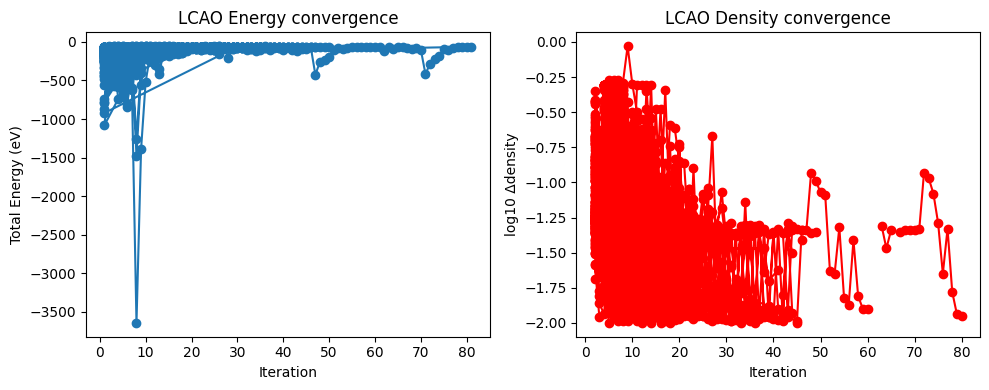

In [21]:
import re
import matplotlib.pyplot as plt

def parse_scf_log(logfile):
    """
    Parse GPAW SCF iteration log for energies and density errors.
    Works with lines like:
    iter:   5 14:13:09   -65.254616        c -1.22
    """
    iterations, energies, dens_errors = [], [], []

    with open(logfile, "r") as f:
        for line in f:
            if line.strip().startswith("iter:"):
                parts = line.split()
                try:
                    it = int(parts[1])
                    energy = float(parts[3])
                    dens_err = None
                    for p in parts:
                        try:
                            if re.match(r"^-?\d+\.\d+$", p):  # pick floats
                                pass
                        except:
                            continue
                    # density error is usually the last float in line
                    try:
                        dens_err = float(parts[-1])
                    except:
                        pass

                    iterations.append(it)
                    energies.append(energy)
                    dens_errors.append(dens_err)
                except:
                    continue

    return iterations, energies, dens_errors


def plot_convergence(logfile):
    it, E, dens = parse_scf_log(logfile)

    plt.figure(figsize=(10,4))

    # Energy plot
    plt.subplot(1,2,1)
    plt.plot(it, E, marker="o")
    plt.xlabel("Iteration")
    plt.ylabel("Total Energy (eV)")
    plt.title("LCAO Energy convergence")

    # Density error plot
    plt.subplot(1,2,2)
    plt.plot(it, dens, marker="o", color="red")
    plt.xlabel("Iteration")
    plt.ylabel("log10 Δdensity")
    plt.title("LCAO Density convergence")

    plt.tight_layout()
    plt.savefig("scf_convergence.png", dpi=300)
    plt.show()


# === Run on your log ===
plot_convergence("caf2_cluster_lcao.log")

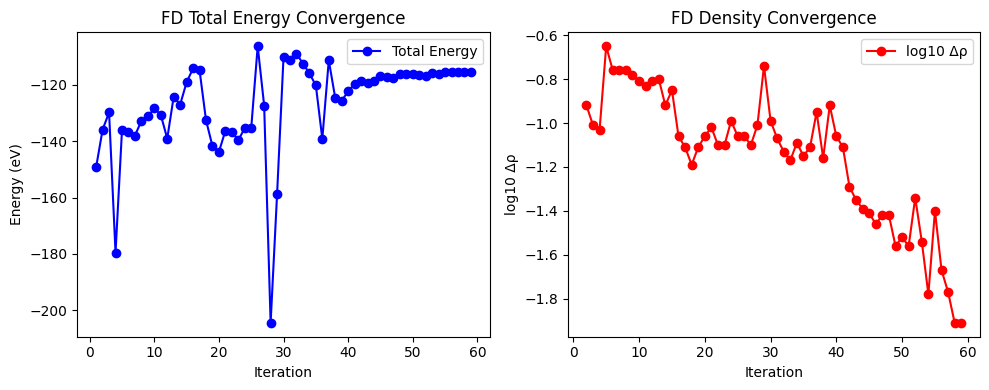

Saved: caf2_fd_convergence.png


In [22]:
import re
import matplotlib.pyplot as plt

def parse_fd_log(logfile):
    """
    Parse GPAW finite-difference SCF iteration log for energies and density errors.
    Works with lines like:
    iter:  10 22:33:04   -512.44321        c -2.14
    """
    iterations, energies, dens_errors = [], [], []

    with open(logfile, "r") as f:
        for line in f:
            if line.strip().startswith("iter:"):
                parts = line.split()
                try:
                    it = int(parts[1])
                    energy = float(parts[3])

                    # Find last float in the line (log10 density change)
                    dens_err = None
                    floats = re.findall(r"-?\d+\.\d+", line)
                    if len(floats) >= 2:
                        dens_err = float(floats[-1])

                    iterations.append(it)
                    energies.append(energy)
                    dens_errors.append(dens_err)
                except Exception:
                    continue

    return iterations, energies, dens_errors


def plot_fd_convergence(logfile, prefix="caf2_cluster_fd"):
    it, E, dens = parse_fd_log(logfile)

    plt.figure(figsize=(10, 4))

    # Energy convergence
    plt.subplot(1, 2, 1)
    plt.plot(it, E, marker="o", color="blue", label="Total Energy")
    plt.xlabel("Iteration")
    plt.ylabel("Energy (eV)")
    plt.title("FD Total Energy Convergence")
    plt.legend()

    # Density convergence
    plt.subplot(1, 2, 2)
    plt.plot(it, dens, marker="o", color="red", label="log10 Δρ")
    plt.xlabel("Iteration")
    plt.ylabel("log10 Δρ")
    plt.title("FD Density Convergence")
    plt.legend()

    plt.tight_layout()
    plt.savefig(f"{prefix}_convergence.png", dpi=300)
    plt.show()

    print(f"Saved: {prefix}_convergence.png")

plot_fd_convergence("caf2_cluster_fd.log", prefix="caf2_fd")

